In [81]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 


In [82]:
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df['job_skills'].head(15)

0                                                  None
1            [r, python, sql, nosql, power bi, tableau]
2     [python, sql, c#, azure, airflow, dax, docker,...
3     [python, c++, java, matlab, aws, tensorflow, k...
4     [bash, python, oracle, aws, ansible, puppet, j...
5                                    [python, sql, gcp]
6     [sql, python, java, sql server, gcp, bigquery,...
7     [sql, nosql, gcp, azure, aws, bigquery, databr...
8                         [excel, powerpoint, power bi]
9     [sql, python, r, mongodb, mongodb, sql server,...
10                   [python, databricks, azure, spark]
11                                       [python, qlik]
12               [sql, php, excel, power bi, sap, jira]
13    [python, sql, go, ruby, ruby, javascript, aws,...
14                                   [mongodb, mongodb]
Name: job_skills, dtype: object

In [83]:
df_explored = df.explode('job_skills')
df_explored['job_posted_month'] = df_explored['job_posted_date'].dt.month
df_explored = df_explored[df['job_title_short'] =='Data Analyst']
# df_explored = df_explored[df['job_title_short'] =='Software Engineer']

C:\Users\Ankit\AppData\Local\Temp\ipykernel_6600\1202729479.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_explored = df_explored[df['job_title_short'] =='Data Analyst']


In [84]:
df_Trending_Skills = df_explored.pivot_table(index='job_posted_month',columns='job_skills', aggfunc='size',fill_value=0)
df_Trending_Skills.loc['Total'] = df_Trending_Skills.sum()
df_Trending_Skills

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [ ]:
# df_Trending_Skills.loc['Total']
df_Trending_Skills = df_Trending_Skills[1(ascending=False).index]
df_Trending_Skills = df_Trending_Skills.drop('Total')
df_Trending_Skills

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month'>

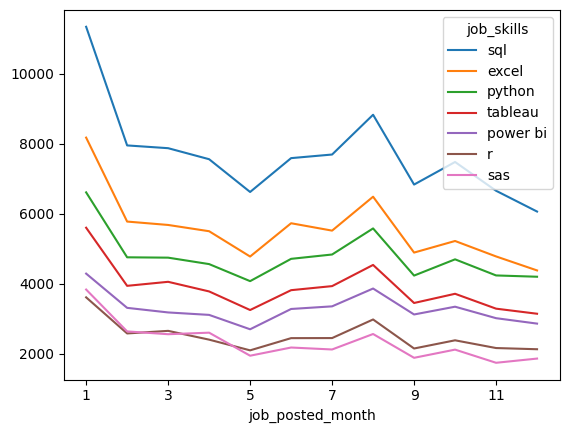

In [86]:
df_Trending_Skills.iloc[:,:7].plot(kind='line')
# df_Trending_Skills[['sql', 'excel','python','tableau','r','power bi']].plot(kind='line')